Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Prva laboratorijska vježba - Geometrija uzorka, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 2. travnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
from matplotlib.patches import Ellipse
from scipy.stats import shapiro, probplot, t, f, multivariate_normal, chi2
import scipy.stats as stats
import random

### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
10 & 3 & 2 \\
7 & 2 & 6 \\
8 & 1 & 3 \\ 
7 & 1 & 4  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [34]:
# Define the data matrix X
X = np.array([[10, 3, 2],
              [7, 2, 6],
              [8, 1, 3],
              [7, 1, 4]])

# Print the data matrix X
#print("Data Matrix X:")
#print(X)

# Calculate the sample mean vector
x_mean = np.mean(X, axis=0)

# Print the sample mean vector
print("Sample Mean Vector:")
print(x_mean)
print()
# Calculate the sample covariance matrix
S = np.cov(X, rowvar=False)

# Print the sample covariance matrix
print("Sample Covariance Matrix:")
print(S)
print()
# Calculate the sample correlation matrix
R = np.corrcoef(X, rowvar=False)

# Print the sample correlation matrix
print("Sample Correlation Matrix:")
print(R)

Sample Mean Vector:
[8.   1.75 3.75]

Sample Covariance Matrix:
[[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]]

Sample Correlation Matrix:
[[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]


Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

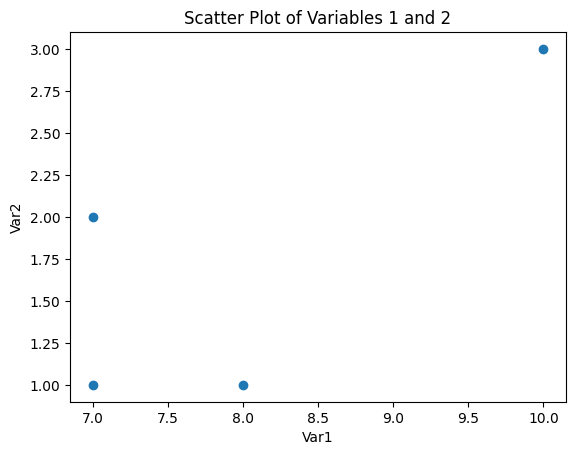

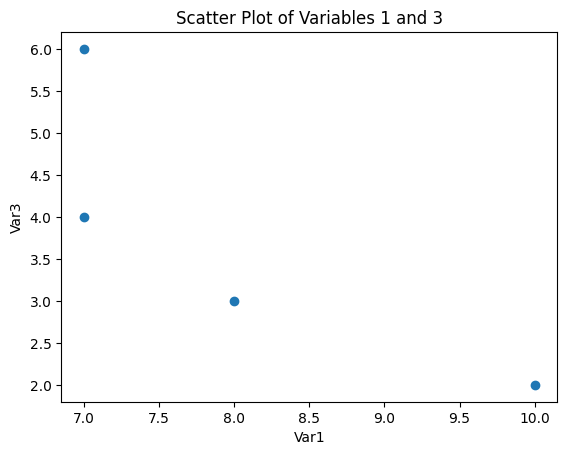

In [35]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Var1")
plt.ylabel("Var2")
plt.title("Scatter Plot of Variables 1 and 2")
plt.show()


plt.scatter(X[:,0], X[:,2])
plt.xlabel("Var1")
plt.ylabel("Var3")
plt.title("Scatter Plot of Variables 1 and 3")
plt.show()

 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = ((\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [36]:
# Extract the first and fourth observations from X
x1 = X[0]
x4 = X[3]

# Calculate the Mahalanobis distance between x1 and x4
S_inv = np.linalg.inv(S)
stat_dist = (x1 - x4).T @ S_inv @ (x1 - x4)

print("Statistical distance between x1 and x4:", stat_dist)

euclidean_dist = np.linalg.norm(x1 - x4)

print("Euclidean distance between x1 and x4:", euclidean_dist)

#statistical distance takes into account the covariance structure of the data, 
#which means that it is more sensitive to differences in the correlations between variables. 
#In this case, variables 1 and 4 have a negative correlation, which increases their 
#statistical distance relative to their Euclidean distance

Statistical distance between x1 and x4: 6.000000000000021
Euclidean distance between x1 and x4: 4.123105625617661


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

In [37]:

# Calculate the residuals for each variable
residuals = X - x_mean


# Calculate the standard deviation of each variable
std_devs = np.std(X, axis=0)
#print("Standard Deviation:\n", np.std(X, axis=0))

# Print the residuals and standard deviations
print("Residuals:")
print(residuals)
print()
print("Standard deviations:")
print(std_devs)
print()

residual_norms = np.linalg.norm(residuals, axis=0)

# Compare the residual norms to the standard deviations
for i, (norm, std_dev) in enumerate(zip(residual_norms, std_devs)):
    print(f"Variable {i+1}: residual norm = {norm}, standard deviation = {std_dev}")

#the length of the residual vector is roughly proportional to the standard deviation. 
#This is because the residuals capture the deviation of each observation from the sample mean, 
#which is a measure of the variability of the data.

Residuals:
[[ 2.    1.25 -1.75]
 [-1.    0.25  2.25]
 [ 0.   -0.75 -0.75]
 [-1.   -0.75  0.25]]

Standard deviations:
[1.22474487 0.8291562  1.47901995]

Variable 1: residual norm = 2.449489742783178, standard deviation = 1.224744871391589
Variable 2: residual norm = 1.6583123951777, standard deviation = 0.82915619758885
Variable 3: residual norm = 2.958039891549808, standard deviation = 1.479019945774904


Generirajte $M = 1000$ realizacija slučajnog vektora dimenzije $4 \times 1$, gdje je svaka varijabla vektora iz diskretne uniformne razdiobe $\mathcal{U}\{0,10\}$. Za svaku varijablu izračunajte standardnu devijaciju i duljinu vektora devijacija. Na grafu prikažite standardnu devijaciju kao funkciju u ovisnosti o duljini vektora devijacija.

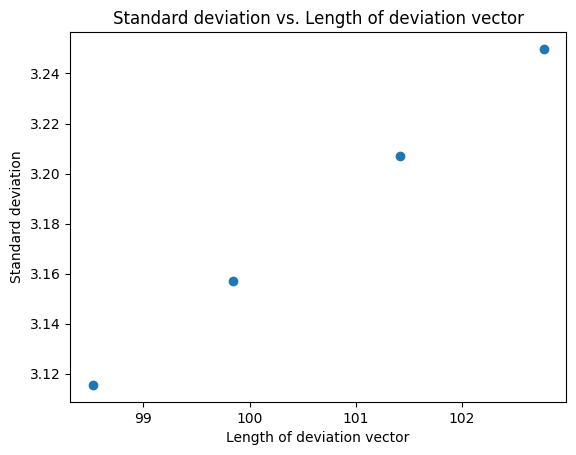

In [51]:

np.random.seed(123)

# Number of realizations
M = 1000

# Dimension of vector
n = 4

# Discrete uniform distribution parameters
a = 0
b = 10

# Generate M realizations of random vector
X1 = np.random.randint(low=a, high=b+1, size=(M, n))
#print(X1)
# Calculate standard deviation for each variable
std_dev = np.std(X1, axis=0)

# Calculate length of deviation vector for each variable
dev_len = np.sqrt(np.sum((X1 - np.mean(X1, axis=0))**2, axis=0))

# Plot standard deviation vs length of deviation vector
plt.scatter(dev_len, std_dev)
plt.xlabel('Length of deviation vector')
plt.ylabel('Standard deviation')
plt.title('Standard deviation vs. Length of deviation vector')
plt.show()

#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

In [50]:
# Calculate deviation matrix
D = X1 - np.mean(X1, axis=0)

# Calculate covariance matrix
S1 = np.dot(D.T, D) / (M - 1)

# Calculate standard deviation vector
std_dev = np.std(X1, axis=0)

# Calculate correlation matrix
R1 = S1 / np.sqrt(np.outer(std_dev, std_dev))

# Print covariance matrix
print('Reconstructed covariance matrix:\n', S1)
print()
# Print correlation matrix
print('Reconstructed correlation matrix:\n', R1/3)
print()
# Calculate the sample covariance matrix
S11 = np.cov(X1, rowvar=False)


print("Covariance Matrix:")
print(S1)
print()
# Calculate the sample correlation matrix
R11 = np.corrcoef(X1, rowvar=False)

# Print the sample correlation matrix
print("Correlation Matrix:")
print(R11)


Reconstructed covariance matrix:
 [[10.29541441 -0.31043644  0.01344945  0.04664765]
 [-0.31043644  9.71632032  0.37403003  0.43868468]
 [ 0.01344945  0.37403003  9.97796196 -0.28504104]
 [ 0.04664765  0.43868468 -0.28504104 10.57185085]]

Reconstructed correlation matrix:
 [[ 1.07008412 -0.0327365   0.0014089   0.00481645]
 [-0.0327365   1.03955366  0.03975269  0.04595526]
 [ 0.0014089   0.03975269  1.05345727 -0.02966232]
 [ 0.00481645  0.04595526 -0.02966232  1.08435507]]

Covariance Matrix:
[[10.29541441 -0.31043644  0.01344945  0.04664765]
 [-0.31043644  9.71632032  0.37403003  0.43868468]
 [ 0.01344945  0.37403003  9.97796196 -0.28504104]
 [ 0.04664765  0.43868468 -0.28504104 10.57185085]]

Correlation Matrix:
[[ 1.         -0.03103844  0.00132697  0.00447128]
 [-0.03103844  1.          0.03798697  0.04328387]
 [ 0.00132697  0.03798697  1.         -0.02775307]
 [ 0.00447128  0.04328387 -0.02775307  1.        ]]


#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [61]:
X = np.array([[10, 3, 2], [7, 2, 6], [8, 1, 3], [7, 1, 4]])

# Generalized sample variance of X
n, p = X.shape
s2_X = np.sum(np.var(X, axis=0, ddof=1) * (n - 1)) / (n - p)
print("Generalized sample variance of X:", s2_X)

# Create matrix Y by adding a fourth variable x4=x1+x2
Y = np.hstack((X, np.sum(X[:, :2], axis=1, keepdims=True)))
print()
print("Matrix Y:\n", Y)
print()
# Regular sample variance of Y
s2_Y = np.var(Y[:, 3], ddof=1)
print("Regular sample variance of Y:", s2_Y)

# the difference between the two is because in Y, the fourth variable is a linear combination 
#of the first two variables, so it is not an independent variable. 
#This means that when calculating the sample variance of Y, 
#we have one less degree of freedom than in X. 
#Therefore, the sample variance of Y will be smaller than the generalized sample variance of X.

Generalized sample variance of X: 17.5

Matrix Y:
 [[10  3  2 13]
 [ 7  2  6  9]
 [ 8  1  3  9]
 [ 7  1  4  8]]

Regular sample variance of Y: 4.916666666666667


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vektore na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [68]:
X_new = X[:-1]
print("New X matrix after removing last observation:\n", X_new)

# Calculate generalized sample variance
n, p = X_new.shape

# calculate mean vector
x_bar = np.mean(X_new, axis=0)

# calculate deviation matrix
D = X_new - x_bar

# calculate sample covariance matrix
S = np.dot(D.T, D) / (n - 1)

# calculate eigenvalues and eigenvectors of S
eigvals, eigvecs = np.linalg.eig(S)
print()
print("Generalized sample variance of new X:", np.sum(eigvals))
print()
print(eigvecs)

New X matrix after removing last observation:
 [[10  3  2]
 [ 7  2  6]
 [ 8  1  3]]

Generalized sample variance of new X: 7.666666666666663

[[-0.58069605 -0.73786479  0.34401694]
 [-0.17731308  0.52704628  0.83113314]
 [ 0.79457673 -0.42163702  0.43688677]]


### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [72]:
mi = np.array([2,3])
sigma = np.array([[100, 36],
                  [36, 36]])
X_mvn = np.random.multivariate_normal(mi, sigma, size = (1000))
print(X_mvn)

[[-7.24987616  4.45522373]
 [11.10140297 -1.01257189]
 [-4.93151126 -8.41361743]
 ...
 [16.02894748  6.92332824]
 [19.13600625 -0.54397042]
 [13.84479522 17.38840021]]


#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

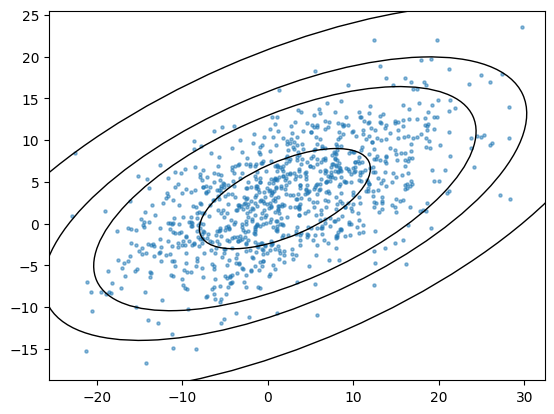

In [103]:

plt.scatter(X_mvn[:, 0], X_mvn[:, 1], s=5, alpha = 0.5)

# Define range of c2 values to use for ellipses
c2_values = [1, 5, 8, 15]
eigenvals, eigenvecs = np.linalg.eig(sigma)
angle=np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
# Compute and plot ellipses with different c2 values
for c2 in c2_values:
    # Compute ellipse parameters
    A = sigma[0, 0]
    B = sigma[1, 1]
    C = sigma[0, 1]
    D = np.sqrt((A-B)**2 + 4*C**2)
    a = np.sqrt(2*(A+B+D))
    b = np.sqrt(2*(A+B-D))
    #theta = 0.5*np.arctan2(2*C, A-B+D)

    # Create ellipse and add to plot
    ellipse = Ellipse(xy=mi, width=a*np.sqrt(c2), height=b*np.sqrt(c2),
                      angle=angle, fill=False) #np.degrees(theta)
    plt.gca().add_artist(ellipse)

plt.show()

#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

In [101]:
sigma1 = np.array([[100, 36],
                  [36, 100]])
X_mvn1 = np.random.multivariate_normal(mi, sigma1, size = (1000))

sigma2 = np.array([[100, 49],
                  [49, 36]])
X_mvn2 = np.random.multivariate_normal(mi, sigma2, size = (1000))

sigma3 = np.array([[100, 64],
                  [64, 36]])
X_mvn3 = np.random.multivariate_normal(mi, sigma3, size = (1000))

<ipython-input-101-d34fe2a2d68b>:11: RuntimeWarning: covariance is not positive-semidefinite.
  X_mvn3 = np.random.multivariate_normal(mi, sigma3, size = (1000))


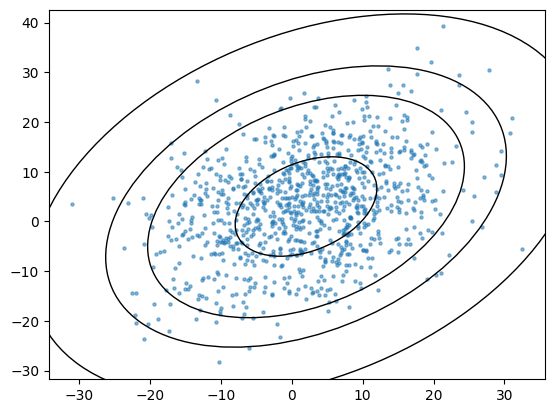

In [104]:
plt.scatter(X_mvn1[:, 0], X_mvn1[:, 1], s=5, alpha = 0.5)
# Define range of c2 values to use for ellipses
c2_values = [1, 5, 8, 15]
eigenvals, eigenvecs = np.linalg.eig(sigma1)
angle=np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
# Compute and plot ellipses with different c2 values
for c2 in c2_values:
    # Compute ellipse parameters
    A = sigma1[0, 0]
    B = sigma1[1, 1]
    C = sigma1[0, 1]
    D = np.sqrt((A-B)**2 + 4*C**2)
    a = np.sqrt(2*(A+B+D))
    b = np.sqrt(2*(A+B-D))
    #theta = 0.5*np.arctan2(2*C, A-B+D)

    # Create ellipse and add to plot
    ellipse = Ellipse(xy=mi, width=a*np.sqrt(c2), height=b*np.sqrt(c2),
                      angle=angle, fill=False) #np.degrees(theta)
    plt.gca().add_artist(ellipse)

plt.show()

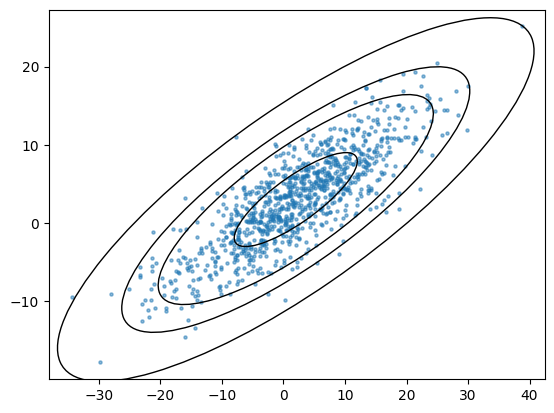

In [105]:
plt.scatter(X_mvn2[:, 0], X_mvn2[:, 1], s=5, alpha = 0.5)
# Define range of c2 values to use for ellipses
c2_values = [1, 5, 8, 15]
eigenvals, eigenvecs = np.linalg.eig(sigma2)
angle=np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
# Compute and plot ellipses with different c2 values
for c2 in c2_values:
    # Compute ellipse parameters
    A = sigma2[0, 0]
    B = sigma2[1, 1]
    C = sigma2[0, 1]
    D = np.sqrt((A-B)**2 + 4*C**2)
    a = np.sqrt(2*(A+B+D))
    b = np.sqrt(2*(A+B-D))
    #theta = 0.5*np.arctan2(2*C, A-B+D)

    # Create ellipse and add to plot
    ellipse = Ellipse(xy=mi, width=a*np.sqrt(c2), height=b*np.sqrt(c2),
                      angle=angle, fill=False) #np.degrees(theta)
    plt.gca().add_artist(ellipse)

plt.show()

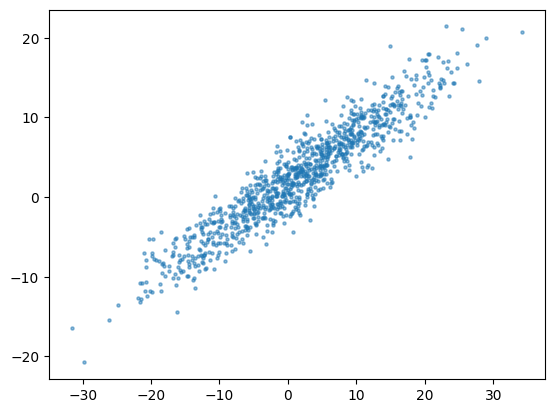

In [109]:
plt.scatter(X_mvn3[:, 0], X_mvn3[:, 1], s=5, alpha = 0.5)
# Define range of c2 values to use for ellipses
c2_values = [1, 5, 8, 15]
eigenvals, eigenvecs = np.linalg.eig(sigma3)
angle=np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
# Compute and plot ellipses with different c2 values


#ovdje ne mozemo nacrtati elipsu jer kovarijanca nije pozitivno-semidefinitna


#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

In [111]:
mir = mi - mi
rho = np.corrcoef(X_mvn1.T, X_mvn2.T)[0, 1]
#sigmar = sigma1 + sigma2 - 2 * rho * np.sqrt(sigma1) * np.sqrt(sigma2) #kad nisu nezavisni
sigmar = sigma1 + sigma2 #nezavisni su
print("Population mean for X3:", mir)
print("Population covariance matrix for X3:\n", sigmar)

Population mean for X3: [0 0]
Population covariance matrix for X3:
 [[200  85]
 [ 85 136]]


Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

In [112]:
n = 10**7

X1 = np.random.multivariate_normal(mi, sigma1, size = (n))
X2 = np.random.multivariate_normal(mi, sigma2, size = (n))
Xr = X1-X2

mire = np.mean(Xr, axis=0)
sigmae = np.cov(Xr, rowvar=False)
print("Population mean for Xr:", mire)
print("Population covariance matrix for Xr:\n", sigmae)

Population mean for Xr: [0.00249195 0.0057621 ]
Population covariance matrix for Xr:
 [[200.07337578  85.04948712]
 [ 85.04948712 135.9893816 ]]


Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_1, (1/n)\mathbf{\Sigma}_1)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [131]:

K = 10**5
n = 100
X1 = np.random.multivariate_normal(mi, sigma1, size=K)
X2 = np.random.multivariate_normal(mi, sigma2, size=K)

Xi = X1 - X2

mi3 = np.mean(Xi, axis=0)
sig = np.cov(Xi.T)
sig *= 1/n

print("mi3 =", mi3)
print("sig =", sig)

mi3 = [-0.01341058 -0.01918553]
sig = [[2.0036849  0.85108263]
 [0.85108263 1.35610159]]


### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

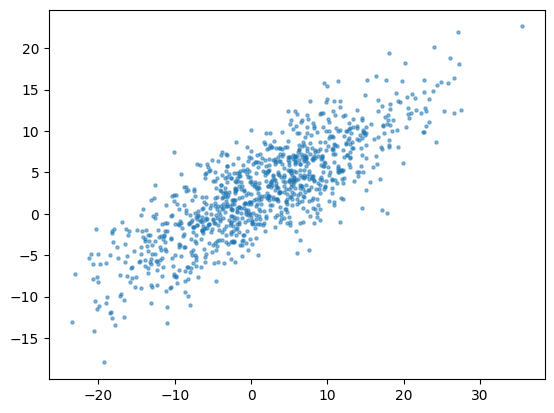

In [153]:
mi = np.array([2,3])
sigma = np.array([[100, 49],
                  [49, 36]])
X = np.random.multivariate_normal(mi, sigma, size = (1000))
#print(X)
plt.scatter(X[:, 0], X[:, 1], s=5, alpha = 0.5)

#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

In [136]:
def hotelling_T2(X, mi):
    n = X.shape[0]
    p = X.shape[1]
    S = np.cov(X, rowvar=False)
    diff = mi - np.mean(X, axis=0)
    T2 = n * np.dot(np.dot(diff.T, np.linalg.inv(S)), diff)
    return T2

Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [138]:
t2 = hotelling_t2(X, mi)

n = X.shape[0]

p = X.shape[1]

df1=p
df2=n-p
a=0.05
F_crit = f.ppf(1-a, df1, df2)

p_val =  1- f.cdf(t2, df1, df2)

print("T2: ", t2)
print("Crit val: ", F_crit)
print("p val: ", p_val)
if (t2> F_crit):
  print("Reject H0")
else:
  print("Cannot reject H0")

T2:  1.2046823986766055
Crit val:  3.0047426924420595
p val:  0.30022275389844433
Cannot reject H0


#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

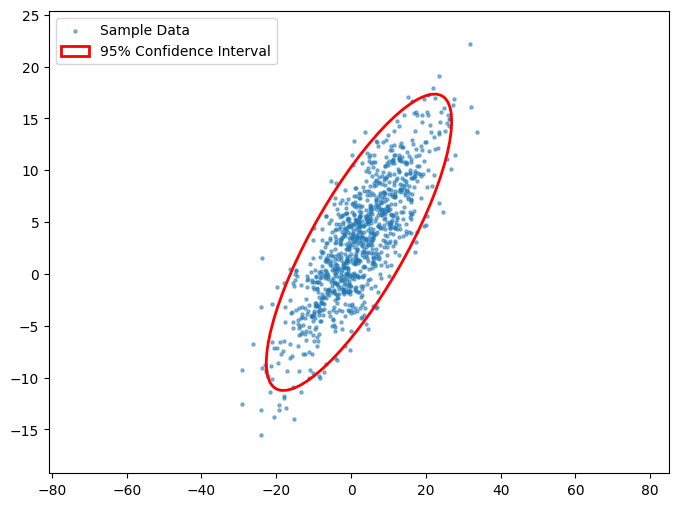

In [159]:
mi = np.array([2, 3])
sigma = np.array([[100, 49], [49, 36]])
X = np.random.multivariate_normal(mi, sigma, size=(1000))

# Calculate the mean and covariance matrix
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(sample_cov)

# Calculate the angle of rotation for the ellipse
theta = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])

# Calculate the width and height of the ellipse based on the eigenvalues
width = 2 * np.sqrt(5.99 * eigenvalues[0])
height = 2 * np.sqrt(5.99 * eigenvalues[1])

# Plot the sample X as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.5)

# Plot the ellipse
ellipse = Ellipse(xy=sample_mean, width=width, height=height, angle=np.degrees(theta), edgecolor='r', fc='None', lw=2)
plt.gca().add_patch(ellipse)

# Set the limits of the plot
plt.xlim(sample_mean[0] - 1.5*width, sample_mean[0] + 1.5*width)
plt.ylim(sample_mean[1] - 1.5*height, sample_mean[1] + 1.5*height)

# Add a legend
plt.legend(['Sample Data','95% Confidence Interval'])

# Show the plot
plt.show()

#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

In [ ]:
# <Vaš kôd ovdje>

Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

In [140]:
alpha = 0.05  # significance level
n = X.shape[0]  # sample size
df = n - 1  # degrees of freedom
t_critical = t.ppf(1 - alpha / 2, df)  # t-critical value
print("t-conf int before correction:")
for i in range(X.shape[1]):
    sample_mean = X[:, i].mean()
    sample_std = X[:, i].std(ddof=1)
    interval = t.interval(alpha, df, loc=sample_mean, scale=sample_std / np.sqrt(n))
    print(f"Variable {i+1}: {interval}")
print()
print("t-conf int after Bonferroni correction:")
alpha = 0.05 / 2  # significance level adjusted for Bonferroni correction
n = X.shape[0]  # sample size
df = n - 1  # degrees of freedom
t_critical = t.ppf(1 - alpha / 2, df)  # t-critical value

for i in range(X.shape[1]):
    sample_mean = X[:, i].mean()
    sample_std = X[:, i].std(ddof=1)
    interval = t.interval(alpha, df, loc=sample_mean, scale=sample_std / np.sqrt(n))
    print(f"Variable {i+1}: {interval}")

t-conf int before correction:
Variable 1: (2.2887700627032923, 2.3290870459265984)
Variable 2: (3.080585088537305, 3.1042104835500273)

t-conf int after Bonferroni correction:
Variable 1: (2.298854268857211, 2.3190028397726796)
Variable 2: (3.0864943440105255, 3.098301228076807)


Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

In [142]:
alpha = 0.05  # significance level
n = X.shape[0]  # sample size
df = n - 1  # degrees of freedom
chi2_lower = chi2.ppf(alpha/2, df)  # chi-square lower critical value
chi2_upper = chi2.ppf(1 - alpha/2, df)  # chi-square upper critical value

for i in range(X.shape[1]):
    sample_mean = X[:, i].mean()
    sample_var = X[:, i].var(ddof=1)
    var_lower = (n-1)*sample_var/chi2_upper
    var_upper = (n-1)*sample_var/chi2_lower
    interval = (sample_mean - np.sqrt(var_upper/n), sample_mean + np.sqrt(var_upper/n))
    print(f"Variable {i+1}: {interval}")

Variable 1: (1.9727962797234255, 2.645060828906465)
Variable 2: (2.8954272508286514, 3.289368321258681)


U idućem zadatku ćete provesti ostatak naučenih metoda vezano uz statističko zaključivanje o više vektora sredine.

### 4. Primjena implementiranih metoda

Učitajte podatkovni skup [*iris*](https://archive.ics.uci.edu/ml/datasets/Iris) (postoji mogućnost i učitavanja unutar jezika - [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) / [R](https://technicaljockey.com/r-programming-training/loading-iris-data-set-in-r/)).

In [144]:
from sklearn.datasets import load_iris

iris = load_iris()

Procijenite parametre $\mathbf{\mu},\mathbf{\Sigma}$ vezane uz 4 numeričke varijable.

In [145]:
X = iris.data[:, :4]
feature_names = iris.feature_names[:4]

# estimate parameters for each variable
for i in range(X.shape[1]):
    variable = X[:, i]
    mi = variable.mean()
    sigma = variable.std(ddof=1)
    print(f"{feature_names[i]}: mi = {mi:.2f}, sigma = {sigma:.2f}")

sepal length (cm): mi = 5.84, sigma = 0.83
sepal width (cm): mi = 3.06, sigma = 0.44
petal length (cm): mi = 3.76, sigma = 1.77
petal width (cm): mi = 1.20, sigma = 0.76


Provedite analizu normalnosti 4 numeričkih varijabli. Ukoliko je potrebno, predložite koje transformacije biste radili na podatcima kako biste ojačali pretpostavke normalnosti u skupu. 

sepal length (cm) distribution is not normal (p-value = 0.0102)


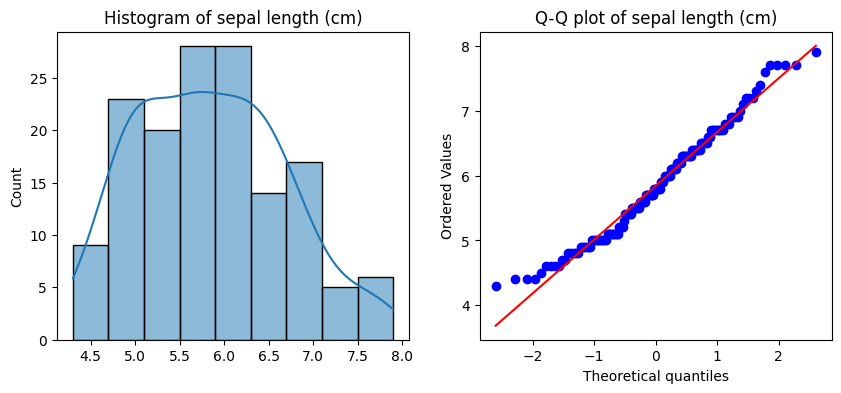

sepal width (cm) distribution is normal (p-value = 0.1011)


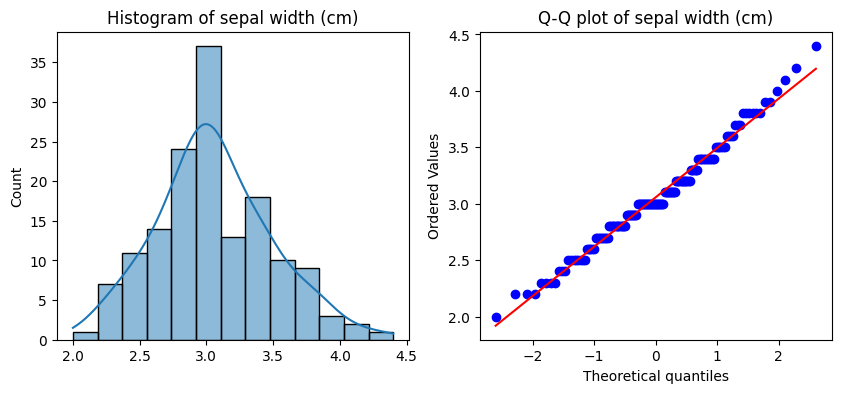

petal length (cm) distribution is not normal (p-value = 0.0000)


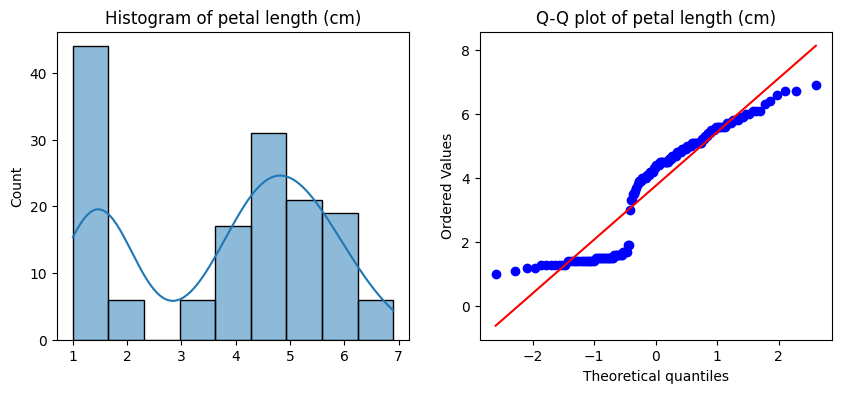

petal width (cm) distribution is not normal (p-value = 0.0000)


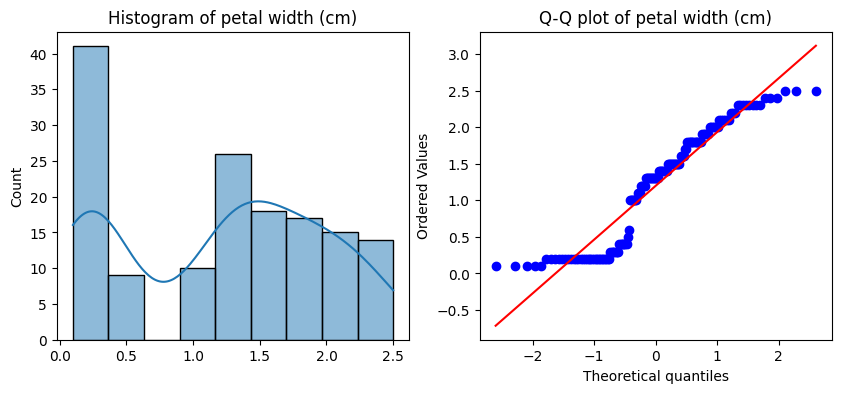

In [148]:
for i in range(X.shape[1]):
    variable = X[:, i]
    variable_name = feature_names[i]
    # test for normality using Shapiro-Wilk test
    stat, p = stats.shapiro(variable)
    if p > 0.05:
        normality = "normal"
    else:
        normality = "not normal"
    print(f"{variable_name} distribution is {normality} (p-value = {p:.4f})")
    # plot histogram and Q-Q plot
    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
    sns.histplot(variable, kde=True, ax=ax[0])
    ax[0].set_title(f"Histogram of {variable_name}")
    stats.probplot(variable, plot=ax[1], fit=True)
    ax[1].set_title(f"Q-Q plot of {variable_name}")
    plt.show()

Provedite detekciju stršećih vrijednosti (vizualno/numerički).

**Hint**: Poglavlje 4.7 (Johnson)

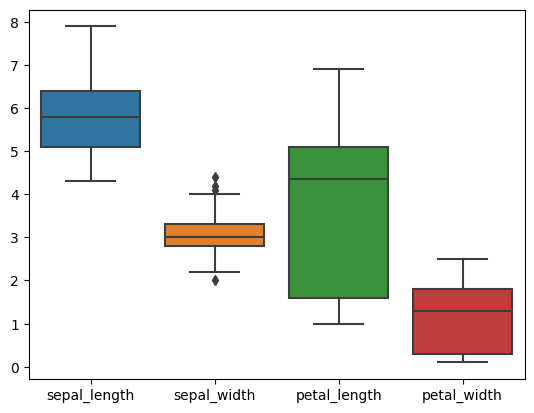

In [161]:
iris_b = sns.load_dataset('iris')

# Create boxplots for the 4 numerical features
print()
sns.boxplot(data=iris_b[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print()

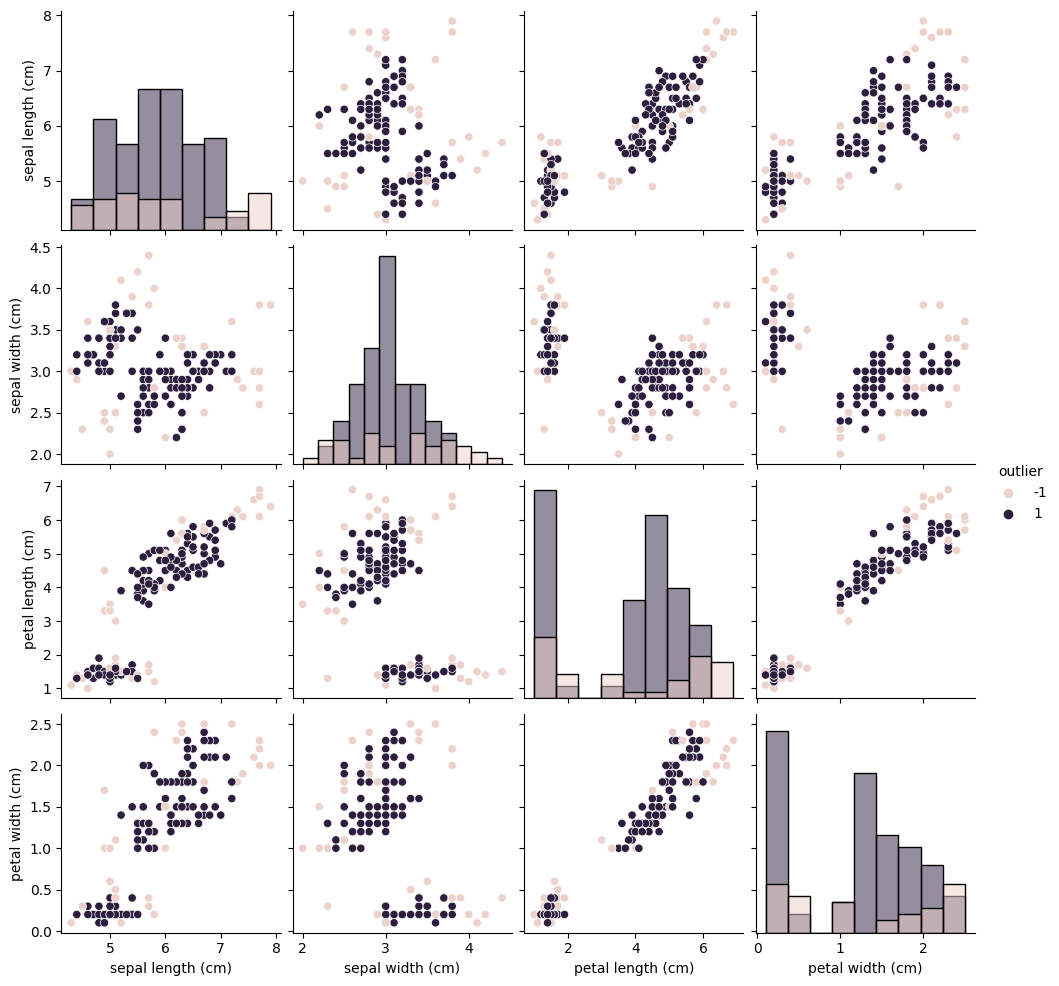

In [163]:
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

iris_df = load_iris()
iris_df = pd.DataFrame(data=iris_df.data, columns=iris_df.feature_names)

outlier_det = IsolationForest(n_estimators=1000)
outlier_det.fit(iris_df)
outliers = outlier_det.predict(iris_df)

iris_df['outlier'] = outliers
sns.pairplot(iris_df, hue='outlier', diag_kind='hist')
plt.show()

Odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli.

**Hint**: Prethodno implementirani $T^2$-interval/ $t$-interval/ Bonferroni

In [170]:
iris1 = sns.load_dataset('iris')
iris2 = iris1.select_dtypes(include=[np.number])

# extract the numerical features
X = iris2.values[:,:4]

# compute the sample mean and covariance
n = X.shape[0]
data_mean = np.mean(X, axis=0)
data_cov = np.cov(X, rowvar=False, ddof=1)

# calculate T2 interval for each feature
p = 4
alpha = 0.05
t2val = t.ppf(1 - alpha/2, n-p)
T2_crit = (n-1)*p*t2val / ((n-p)*t2val + p)
T2_lb = data_mean - np.sqrt(T2_crit/n) * np.sqrt(np.diag(data_cov))
T2_ub = data_mean + np.sqrt(T2_crit/n) * np.sqrt(np.diag(data_cov))

# print the results
feature_names = iris2.columns[:4]
for i in range(4):
    print(f"T2 interval ({feature_names[i]}): [{T2_lb[i]:.3f}, {T2_ub[i]:.3f}]")
print()

#t2 no correction
data_se = np.std(X, axis=0, ddof=1) / np.sqrt(n)
alpha = 0.05
tval = t.ppf(1 - alpha/2, n-1)
t_lb = data_mean - tval * data_se
t_ub = data_mean + tval * data_se

# print the results
feature_names = iris2.columns[:4]
for i in range(4):
    print(f"t-interval ({feature_names[i]}): [{t_lb[i]:.3f}, {t_ub[i]:.3f}]")

print()
# calculate t-interval with Bonferroni correction for each feature
alpha = 0.05 / 4
tval = t.ppf(1 - alpha/2, n-1)
t_lb = data_mean - tval * data_se
t_ub = data_mean + tval * data_se

# print the results
feature_names = iris2.columns[:4]
for i in range(4):
    print(f"t-interval Bonferroni ({feature_names[i]}): [{t_lb[i]:.3f}, {t_ub[i]:.3f}]")

T2 interval (sepal_length): [5.708, 5.979]
T2 interval (sepal_width): [2.986, 3.129]
T2 interval (petal_length): [3.469, 4.047]
T2 interval (petal_width): [1.074, 1.324]

t-interval (sepal_length): [5.710, 5.977]
t-interval (sepal_width): [2.987, 3.128]
t-interval (petal_length): [3.473, 4.043]
t-interval (petal_width): [1.076, 1.322]

t-interval Bonferroni (sepal_length): [5.672, 6.014]
t-interval Bonferroni (sepal_width): [2.967, 3.147]
t-interval Bonferroni (petal_length): [3.394, 4.122]
t-interval Bonferroni (petal_width): [1.042, 1.357]


Razmatramo *species: virginica* populaciju. Razlikuju li se  *sepal* __length__ i __width__ varijable od *petal* __length__ i __width__ varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?

**Hint**: Metoda uparenih usporedbi

In [173]:
from scipy.stats import ttest_rel
iris = sns.load_dataset('iris')

# extract the numerical features for virginica
X_virginica = iris.loc[iris.species=='virginica', ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values



# perform paired t-test for petals and sepals
t_pw_sw, p_pw_sw = ttest_rel(X_virginica[:, 2:], X_virginica[:, :2])
print("Paired t-test for petals and sepals:")
print(f"t-value: {t_pw_sw}")
print(f"p-value: {p_pw_sw}")
#we can conclude that the sepal measurements and petal 
#measurements are significantly different for the species virginica

Paired t-test for petals and sepals:
t-value: [-22.89805895 -23.10414661]
p-value: [7.98525949e-28 5.33905737e-28]


Usporedite vektore srednjih vrijednosti za sve varijable između svih *species* populacija. Postoji li statistički značajna razlika?

**Hint**: MANOVA

In [176]:
from statsmodels.multivariate.manova import MANOVA
manova=MANOVA.from_formula('sepal_length + sepal_width +petal_length+petal_width ~ species', data = iris)
print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

**Bonus**: Postoji li dodatno istraživačko pitanje koje želite testirati?

In [ ]:
Ne za sada. 